# Проверка гипотез для увеличения выручки интернет-магазина

# Содержание данных и постановка задач
## Часть 1 Приоритизация гипотез.

9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
### Задачи
1. Фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Как изменилась приоритизация гипотез при применении RICE вместо ICE. 

## Часть 2. Анализ A/B-теста

Проведение A/B-теста и получение результатов
### Задачи
1. График кумулятивной выручки по группам. Сделайте выводы и предположения.
2. График кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. График относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. График кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. График относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Подсчет 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.
8. Точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Подсчет 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.
10. Подсчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения.
11. Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
12. Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения.
13. Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
14. Решение по результатам теста. 

Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Описание данных

### Данные для первой части
#### Файл /datasets/hypothesis.csv. 
**Hypothesis** — краткое описание гипотезы;

**Reach** — охват пользователей по 10-балльной шкале;

**Impact** — влияние на пользователей по 10-балльной шкале;

**Confidence** — уверенность в гипотезе по 10-балльной шкале;

**Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Данные для второй части
#### Файл /datasets/orders.csv.
**transactionId** — идентификатор заказа;

**visitorId** — идентификатор пользователя, совершившего заказ;

**date** — дата, когда был совершён заказ;

**revenue** — выручка заказа;

**group** — группа A/B-теста, в которую попал заказ.

#### Файл /datasets/visitors.csv. 
**date** — дата;

**group** — группа A/B-теста;

**visitors** — количество пользователей в указанную дату в указанной группе A/B-теста


## Изучение данных


In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

from datetime import datetime


In [2]:
#открытие датасетов
try:
    hypothesis = pd.read_csv('/Users/maria/Documents/Практикум/Принятие решений на основе данных/hypothesis.csv')
    orders = pd.read_csv('/Users/maria/Documents/Практикум/Принятие решений на основе данных/orders.csv')
    visitors = pd.read_csv('/Users/maria/Documents/Практикум/Принятие решений на основе данных/visitors.csv')


except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')


In [3]:
hypothesis.info()

pd.options.display.max_colwidth = 400
hypothesis.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5


In [4]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [5]:
hypothesis.duplicated().sum()

0

**Выводы** 

Первое представление о данных получено. 
Пропуски и дубликаты в данных не представлены. 

In [6]:
orders.info()
orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
825,446569841,1471458381,2019-08-27,110,B
174,2089115464,2366521417,2019-08-02,2800,B
984,3217433767,2637462286,2019-08-10,100,B
525,3031564664,393266494,2019-08-19,21550,A
470,2234122314,3310105714,2019-08-03,8780,B


In [7]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [8]:
orders.duplicated().sum()

0

**Выводы** 

Первое представление о данных получено. 
Пропуски и дубликаты в данных не представлены. 

In [9]:
visitors.info()
visitors.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
32,2019-08-02,B,581
49,2019-08-19,B,487
16,2019-08-17,A,412
39,2019-08-09,B,610
24,2019-08-25,A,621


In [10]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [11]:
visitors.duplicated().sum()

0

**Выводы** 

Первое представление о данных получено. 
Пропуски и дубликаты в данных не представлены. 

## Подготовка данных

In [12]:
#приведение дат к типу to_datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Данные подготовлены к анализу

## Часть 1. Приоритизация гипотез

### Фреймворк ICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.

Фреймворк ICE состоит из трёх компонент: Impact, Confidence, Efforts. Формула следующая: Impact*Confidence/Efforts

Фреймворк RICE состоит из четырёх компонент: Reach, Impact, Confidence, Efforts. Формула следующая: Reach*Impact*Confidence/Efforts

Reach — скольких пользователей затронет изменение, которое вы хотите внести;

Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;

Efforts — сколько стоит протестировать эту гипотезу.

In [13]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(1)

pd.options.display.max_colwidth = 400
hypothesis.sort_values('ICE', ascending=False).head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


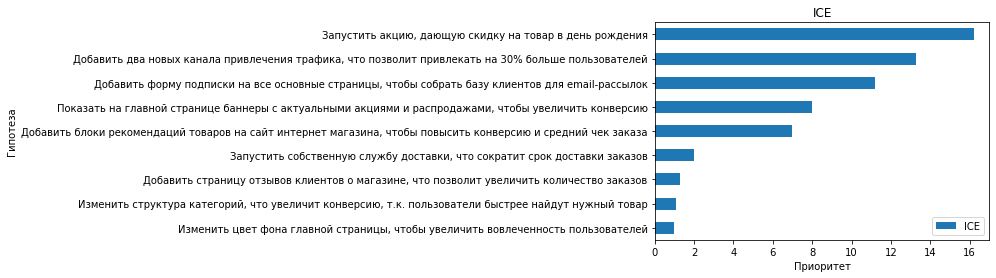

In [14]:
#визуализация Фреймворка ICE для приоритизации гипотез
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

### Фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [15]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('RICE', ascending=False).head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


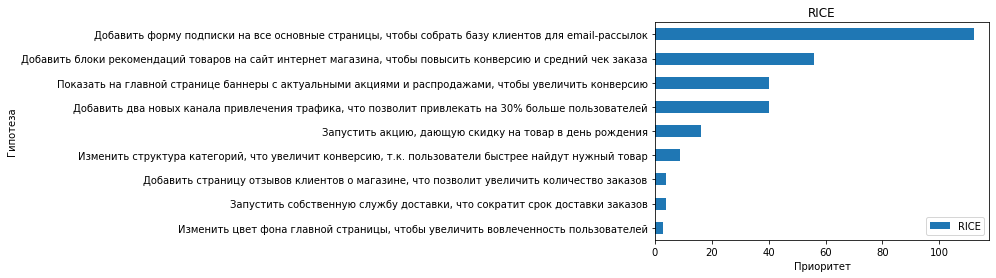

In [16]:
#визуализация Фреймворка RICE для приоритизации гипотез
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

### Как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [17]:
display(hypothesis[['ICE', 'RICE']].sort_values(by='RICE', ascending=False))


,ICE,RICE
7,11.2,112.0
2,7.0,56.0
0,13.3,40.0
6,8.0,40.0
8,16.2,16.2
3,1.1,9.0
1,2.0,4.0
5,1.3,4.0
4,1.0,3.0


**Выводы** 

Модификация RICE учитывает дополнительный фактор для приоритизации гипотез - Reach - охват пользователей. На графиках отчетливо видно, что порядок гипотез поменялся и на лидирующие позиции вышли те гипотезы, которые при измерении рейтинга ICE лидирующими не были. Есть лишь одна гипотеза, значения ICE и RICE в которых совпадают - гипотеза 8.

## Часть 2. Анализ А/В теста

In [18]:
#проверка посетителей, пересекающихся в обеих группах
inter = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
inter

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

Повторяющихся в обоих группах достаточно много, это может повлиять на результаты исследования. Лучше исключить этих пользователей из выборки

In [19]:
#удаление пользователей, состоящих в обеих группах
orders = orders[~orders['visitorId'].isin(inter)]

In [20]:
#повторная проверка посетителей, пересекающихся в обеих группах после удаления
inter2 = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
inter2

array([], dtype=int64)

### График кумулятивной выручки по группам. Выводы и предположения.


In [21]:
#группировка датасета orders по дате
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionId':'nunique','visitorId':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionId':'orders','visitorId':'buyers'})
orders_grouped = orders_grouped.set_index(['date','group'])
#подсчет суммы с накоплением методом cumsum()
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group').cumsum().reset_index()

#подсчет суммы визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
#подсчет суммы с накоплением методом cumsum()
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group').cumsum().reset_index()  

#подсчет кумулятивной выручки
cum = orders_cumsum.join(visitors_cumsum[['visitors']])
#создание столбца с ожидаемой выручкой и конверсией
cum['average_rev'] = cum['revenue'] / cum['orders']
cum['conversion'] = cum['orders'] / cum['visitors']

cum.head()

,date,group,orders,buyers,revenue,visitors,average_rev,conversion
0,2019-08-01,A,23,19,142779,719,6207.782609,0.031989
1,2019-08-01,B,17,17,59758,713,3515.176471,0.023843
2,2019-08-02,A,42,37,234381,1338,5580.500000,0.031390
3,2019-08-02,B,40,39,221801,1294,5545.025000,0.030912
4,2019-08-03,A,66,61,346854,1845,5255.363636,0.035772


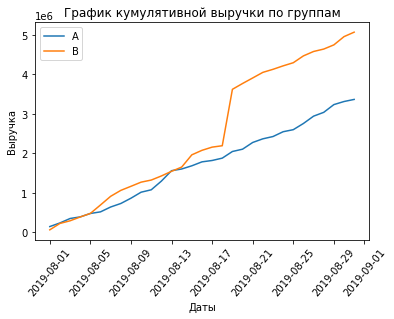

In [22]:
#график кумулятивной выручки по группам
cumA = cum[cum['group']=='A'][['date', 'revenue']]
cumB = cum[cum['group']=='B'][['date', 'revenue']]
plt.plot(cumA.iloc[:,0].to_frame(), cumA.iloc[:,1].to_frame(), label='A' )
plt.plot(cumB.iloc[:,0].to_frame(), cumB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xlabel("Даты")
plt.xticks(rotation=50)
plt.legend()
plt.show()

Линейный рост зафиксирован и у группы А и у группы B. В то же время, у группы B виден резкий рост активности в середине августа 2019 года (17-21 августа).

### График кумулятивного среднего чека по группам. Выводы и предположения.

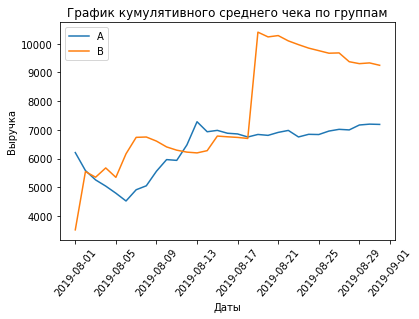

In [23]:
#график кумулятивного среднего чека по группам
cumA = cum[cum['group']=='A'][['date', 'average_rev']]
cumB = cum[cum['group']=='B'][['date', 'average_rev']]
plt.plot(cumA.iloc[:,0].to_frame(), cumA.iloc[:,1].to_frame(), label='A' )
plt.plot(cumB.iloc[:,0].to_frame(), cumB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xlabel("Даты")
plt.xticks(rotation=50)
plt.legend()
plt.show()

Рост показателей группы А более мягкий, чем у группы B. В то же время, оба показателя показывают резкий рост, в середине августа переходящий в плавное падение.

### График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.


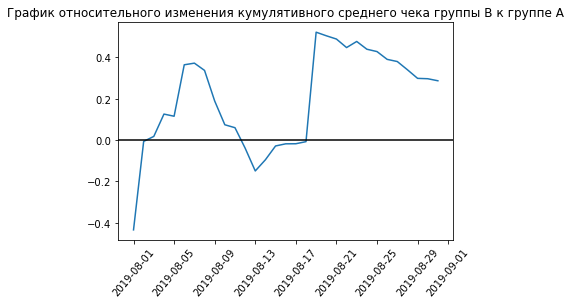

In [24]:
#график относительного изменения кумулятивного среднего чека группы B к группе A
rel_change = (cumA[['date', 'average_rev']].merge(cumB[['date', 'average_rev']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(rel_change['date'], rel_change['average_rev_B'] / rel_change['average_rev_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='-')
plt.xticks(rotation=50)
plt.show()

График относительного изменения кумулятивного среднего чека группы B к группе A демонстрирует схожую картину: рост в начале августа, резкое падение 13 августа, резкий рост до 20-21 августа и дальнейшее плавное падение.

### График кумулятивной конверсии по группам. Выводы и предположения.


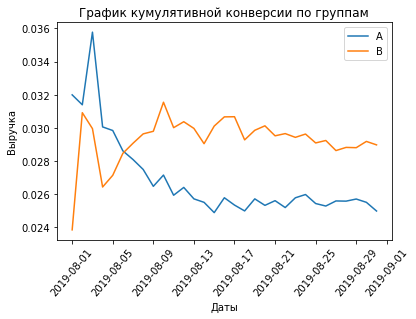

In [25]:
cumA = cum[cum['group']=='A'][['date', 'conversion']]
cumB = cum[cum['group']=='B'][['date', 'conversion']]
plt.plot(cumA.iloc[:,0].to_frame(), cumA.iloc[:,1].to_frame(), label='A' )
plt.plot(cumB.iloc[:,0].to_frame(), cumB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.xlabel("Даты")
plt.xticks(rotation=50)
plt.legend()
plt.show()

На графике зафиксирован первый пик роста 3 и 2 августа для групп А и В соответственно, далее резкое падение и волнообразный график роста и падений, постепенно сужающий волны к концу августа. Группа B показывает значительно более высокие показатели кумулятивной конверсии по сравнению с группой А после 5 августа.

### График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.


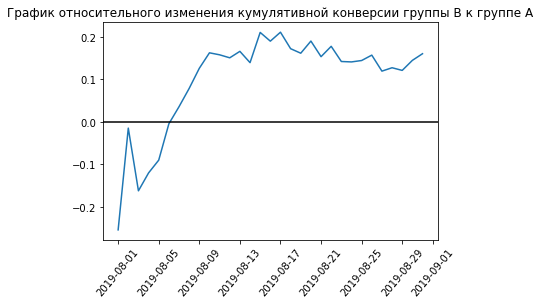

In [26]:
rel_change = (cumA[['date', 'conversion']].merge(cumB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(rel_change['date'], rel_change['conversion_B'] / rel_change['conversion_A']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='-')
plt.xticks(rotation=50)
plt.show()

При ограниченном времени тестирования (1 месяц) график относительного изменения кумулятивной конверсии группы B к группе A показывает значительное превышение группы B в сравнении с группой А.

### Точечный график количества заказов по пользователям. Выводы и предположения.


In [27]:
#группировка коичества заказов по пользователям
orders_per_users = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})\
                         .rename(columns={'transactionId':'orders'})
#проверка корректности действия куска кода
orders_per_users.sample(3)

,visitorId,orders
116,517094627,1
179,793112967,1
338,1471496742,1


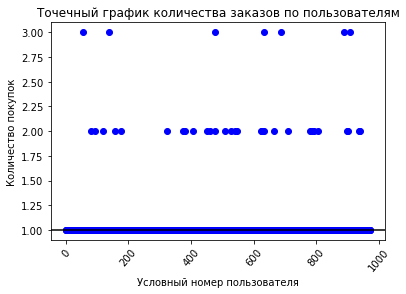

In [28]:
#измерение количества покупок покупателями
x_values = pd.Series(range(0,len(orders_per_users['orders'])))
plt.scatter(x_values, orders_per_users['orders'], color='blue')
plt.title('Точечный график количества заказов по пользователям')
plt.axhline(y=1, color='black', linestyle='-')
plt.xlabel('Условный номер пользователя')
plt.ylabel('Количество покупок')
plt.xticks(rotation=50)
plt.show()

Наибольшее количество покупок совершается одним покупателем 2 раза, но есть достаточно значительное количество пользователей совершают до 5 покупок. Есть точечные пользователи, которые совершают от 8 до 11 покупок.

### Подсчет 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.


In [29]:
#Подсчет 95-го и 99-го перцентилей количества заказов на пользователя. 
display(np.percentile(orders_per_users['orders'], [95, 99])) 

array([1., 2.])

In [30]:
#удаление всех значений выше 99-го перцентиля
np.ptp(orders_per_users['orders'], axis=0)
abnormalUsers = orders_per_users[orders_per_users['orders'] >= 4]['visitorId'].to_list()

99-й перцентиль - максимальное значение для подсчета и удаления аномальных данных. Выбросы (покупатели с большим количеством покупок) будут изолированы, чтобы можно было более корректно оценить результаты исследования.

### Точечный график стоимостей заказов. Выводы и предположения.


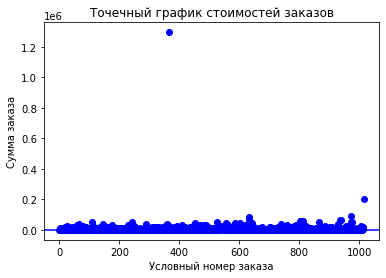

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='blue')
plt.title('Точечный график стоимостей заказов')
plt.axhline(y=0, color='blue', linestyle='-')
plt.xlabel('Условный номер заказа')
plt.ylabel('Сумма заказа')
plt.show()

На графике отображены 2 выброса, один из которых значительно выше уровня стандартных данных.

### Подсчет 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.


In [32]:
#Подсчет 95-го и 99-го перцентилей стоимости заказов. 
display(np.percentile(orders['revenue'], [95, 99])) 

array([26785., 53904.])

In [33]:
#подсчет максимальной прибыли
np.ptp(orders['revenue'], axis=0)

1294450

99-й перцентиль - максимальное значение для подсчета и удаления аномальных данных. Соответственно, все значения больше 58233.2 можно считать аномальными.

### Подсчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения.


**Гипотезы** 

**H0:** Между конверсиями групп А и B значитильных различий нет.

**H1:** Между конверсиями групп А и B есть значительные различия.

In [34]:
#вычисление конверсии
conversion = (orders.groupby('group').agg({'transactionId':'count'}).rename(columns={'transactionId':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']
#просмотр получившегося результата
conversion

,group,orders,visitors,conversion
0,A,468,18736,0.024979
1,B,548,18916,0.028970


In [35]:
#Подсчитываем статистическую значимость различия в среднем количестве заказов между группами.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [36]:
#Передаем аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд)
sample_A = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum()
                              - len(ordersByUsersA['orders'])), name='orders')
    ], axis=0)

sample_B = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum()
                              - len(ordersByUsersB['orders'])), name='orders')
    ], axis=0)

In [37]:
#подсчет статистической значимости различий в конверсии между группами по «сырым» данным
print("{0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))
print("{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

0.011
0.160


По "сырым" данным значительных различий в группах A и B не замечено. При a, составляющем 0.011 - p_value меньше данного значения, то есть причины отвергать нулевую гипотезу есть.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.


**Гипотезы** 

**H0:** Между средними чеками групп нет статистически значимой разницы.

**H1:** Между конверсиями групп есть статистически значимая разница.

In [38]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.829'

'0.287'

P-value значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. Относительный проигрыш группы B равен 28.7% — второе число в выводе является статистически значимым, и означает, что средний чек группы B ниже среднего чека группы A.

### Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения.


**Гипотезы** 

**H0:** Между конверсиями групп А и B значитильных различий нет.

**H1:** Между конверсиями групп А и B есть значительные различия.

In [39]:
#подготовка очищенных от аномалий данных для подсчета статистической значимости различий в конверсии между группами
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 10000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [40]:
#подсчет статистической значимости различий в конверсии между группами по «очищенным» данным
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00679
0.219


По очищенным данным можно сделать следующий вывод: При a, составляющем 0.05 - p_value меньше данного значения, то есть причины отвергать нулевую гипотезу есть.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.


**Гипотезы** 

**H0:** Между средними чеками групп нет статистически значимой разницы.

**H1:** Между конверсиями групп есть статистически значимая разница.

In [41]:
#подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным
display(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'0.759'

'0.008'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительная разница составляет менее 1% и не является статистически значимой.

## Выводы

Группа B показывает более линейный рост, по сравнению с группой А. 
Статистически значимое различие по конверсии между группами обнаружено как по сырым данным, так и по очищенным, статистически значимое различие проявляется.

Как по сырым данным, так и по очищенным нет статистически значимого различия по среднему чеку между группами. В то же время, относительная разница для групп при очищенных данных составляет менее 1% и не является статистически значимой.
